Credit to: 

kxx for https://www.kaggle.com/kailex/ac-dc <br>
Vopani for https://www.kaggle.com/rohanrao/ashrae-half-and-half <br>
NZ for https://www.kaggle.com/nz0722/aligned-timestamp-lgbm-by-meter-type <br>

In [1]:
import gc
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import datetime

myfavouritenumber = 0
seed = myfavouritenumber
random.seed(seed)

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
df_train = pd.read_feather('../input/ashrae-feather/train.ft')
df_test = pd.read_feather('../input/ashrae-feather/test.ft')

building = pd.read_feather('../input/ashrae-feather/building.ft')
le = LabelEncoder()
building.primary_use = le.fit_transform(building.primary_use)

# weather_train = pd.read_feather('../input/ashrae-feather/weather_train.ft')
# weather_test = pd.read_feather('../input/ashrae-feather/weather_test.ft')

DATA_PATH = "../input/ashrae-energy-prediction/"
weather_train = pd.read_csv(DATA_PATH + 'weather_train.csv')
weather_test = weather_df = pd.read_csv(DATA_PATH + 'weather_test.csv')

CPU times: user 2.78 s, sys: 1.17 s, total: 3.95 s
Wall time: 6.55 s


In [3]:
%%time
df_train = df_train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20 18")')
df_train = df_train.query('not (building_id == 681 & meter == 0 & timestamp <= "2016-04-27")')
df_train = df_train.query('not (building_id == 761 & meter == 0 & timestamp <= "2016-09-02")')
df_train = df_train.query('not (building_id == 799 & meter == 0 & timestamp <= "2016-09-02")')
df_train = df_train.query('not (building_id == 802 & meter == 0 & timestamp <= "2016-08-24")')
df_train = df_train.query('not (building_id == 1073 & meter == 0 & timestamp <= "2016-10-26")')
df_train = df_train.query('not (building_id == 1094 & meter == 0 & timestamp <= "2016-09-08")')
df_train = df_train.query('not (building_id == 29 & meter == 0 & timestamp <= "2016-08-10")')
df_train = df_train.query('not (building_id == 40 & meter == 0 & timestamp <= "2016-06-04")')
df_train = df_train.query('not (building_id == 45 & meter == 0 & timestamp <= "2016-07")')
df_train = df_train.query('not (building_id == 106 & meter == 0 & timestamp <= "2016-11")')
df_train = df_train.query('not (building_id == 107 & meter == 0 & timestamp >= "2016-11-10")')
df_train = df_train.query('not (building_id == 112 & meter == 0 & timestamp < "2016-10-31 15")')
df_train = df_train.query('not (building_id == 144 & meter == 0 & timestamp > "2016-05-14" & timestamp < "2016-10-31")')
df_train = df_train.query('not (building_id == 147 & meter == 0 & timestamp > "2016-06-05 19" & timestamp < "2016-07-18 15")')
df_train = df_train.query('not (building_id == 171 & meter == 0 & timestamp <= "2016-07-05")')
df_train = df_train.query('not (building_id == 177 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-26" & timestamp < "2016-12-12")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-08-30" & timestamp < "2016-09-08")')
df_train = df_train.query('not (building_id == 258 & meter == 0 & timestamp > "2016-09-18" & timestamp < "2016-09-25")')
df_train = df_train.query('not (building_id == 260 & meter == 0 & timestamp <= "2016-05-11")')
df_train = df_train.query('not (building_id == 269 & meter == 0 & timestamp > "2016-06-04" & timestamp < "2016-06-25")')
df_train = df_train.query('not (building_id == 304 & meter == 0 & timestamp >= "2016-11-20")')
df_train = df_train.query('not (building_id == 545 & meter == 0 & timestamp > "2016-01-17" & timestamp < "2016-02-10")')
df_train = df_train.query('not (building_id == 604 & meter == 0 & timestamp < "2016-11-21")')
df_train = df_train.query('not (building_id == 693 & meter == 0 & timestamp > "2016-09-07" & timestamp < "2016-11-23")')
df_train = df_train.query('not (building_id == 693 & meter == 0 & timestamp > "2016-07-12" & timestamp < "2016-05-29")')
df_train = df_train.query('not (building_id == 723 & meter == 0 & timestamp > "2016-10-06" & timestamp < "2016-11-22")')
df_train = df_train.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-29" & timestamp < "2016-06-22")')
df_train = df_train.query('not (building_id == 733 & meter == 0 & timestamp > "2016-05-19" & timestamp < "2016-05-20")')
df_train = df_train.query('not (building_id == 803 & meter == 0 & timestamp > "2016-9-25")')
df_train = df_train.query('not (building_id == 815 & meter == 0 & timestamp > "2016-05-17" & timestamp < "2016-11-17")')
df_train = df_train.query('not (building_id == 848 & meter == 0 & timestamp > "2016-01-15" & timestamp < "2016-03-20")')
df_train = df_train.query('not (building_id == 857 & meter == 0 & timestamp > "2016-04-13")')
df_train = df_train.query('not (building_id == 909 & meter == 0 & timestamp < "2016-02-02")')
df_train = df_train.query('not (building_id == 909 & meter == 0 & timestamp < "2016-06-23")')
df_train = df_train.query('not (building_id == 1008 & meter == 0 & timestamp > "2016-10-30" & timestamp < "2016-11-21")')
df_train = df_train.query('not (building_id == 1113 & meter == 0 & timestamp < "2016-07-27")')
df_train = df_train.query('not (building_id == 1153 & meter == 0 & timestamp < "2016-01-20")')
df_train = df_train.query('not (building_id == 1169 & meter == 0 & timestamp < "2016-08-03")')
df_train = df_train.query('not (building_id == 1170 & meter == 0 & timestamp > "2016-06-30" & timestamp < "2016-07-05")')
df_train = df_train.query('not (building_id == 1221 & meter == 0 & timestamp < "2016-11-04")')
df_train = df_train.query('not (building_id == 1225 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-01-13 22" & timestamp < "2016-03-08 12")')
df_train = df_train.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-07-14" & timestamp < "2016-11-19")')
df_train = df_train.query('not (building_id == 1250 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1255 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1264 & meter == 0 & timestamp > "2016-08-23")')
df_train = df_train.query('not (building_id == 1265 & meter == 0 & timestamp > "2016-05-06" & timestamp < "2016-05-26")')
df_train = df_train.query('not (building_id == 1272 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1275 & building_id <= 1280 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1283 & meter == 0 & timestamp > "2016-07-08" & timestamp < "2016-08-03")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1302 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-07-25 22" & timestamp < "2016-07-27 16")')
df_train = df_train.query('not (building_id == 1303 & meter == 0 & timestamp > "2016-01-26" & timestamp < "2016-06-02 12")')
df_train = df_train.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-05-17 16" & timestamp < "2016-06-07 12")')
df_train = df_train.query('not (building_id == 1319 & meter == 0 & timestamp > "2016-08-18 14" & timestamp < "2016-09-02 14")')
df_train = df_train.query('not (building_id == 1322 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')

# 2nd cleaning
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-10-14 22" & timestamp < "2016-10-17 08")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-07-01 14" & timestamp < "2016-07-05 06")')
df_train = df_train.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1297 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1300 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1302 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1291 & building_id <= 1299 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1221 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1225 & building_id <= 1226 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1241 & meter == 0 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1223 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1226 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1225 & building_id <= 1226 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1305 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1307 & meter == 2 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1223 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1231 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1233 & building_id <= 1234 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1272 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id >= 1275 & building_id <= 1297 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1300 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1293 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
df_train = df_train.query('not (building_id == 1302 & meter == 3 & timestamp > "2016-09-28 07" & timestamp < "2016-10-25 12")')
df_train = df_train.query('not (building_id == 1223 & meter == 0 & timestamp > "2016-9-28 07" & timestamp < "2016-10-11 18")')
df_train = df_train.query('not (building_id == 1225 & meter == 1 & timestamp > "2016-8-22 23" & timestamp < "2016-10-11 14")')
df_train = df_train.query('not (building_id == 1230 & meter == 1 & timestamp > "2016-8-22 08" & timestamp < "2016-10-05 18")')
df_train = df_train.query('not (building_id == 904 & meter == 0 & timestamp < "2016-02-17 08")')
df_train = df_train.query('not (building_id == 986 & meter == 0 & timestamp < "2016-02-17 08")')
df_train = df_train.query('not (building_id == 954 & meter == 0 & timestamp < "2016-08-08 11")')
df_train = df_train.query('not (building_id == 954 & meter == 0 & timestamp < "2016-06-23 08")')
df_train = df_train.query('not (building_id >= 745 & building_id <= 770 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')
df_train = df_train.query('not (building_id >= 774 & building_id <= 787 & meter == 1 & timestamp > "2016-10-05 01" & timestamp < "2016-10-10 09")')

# 3rd cleaning hourly spikes
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-05-11 09" & timestamp < "2016-05-12 01")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp == "2016-02-26 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp == "2016-02-26 01")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp == "2016-02-26 01")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-03-29 10" & timestamp < "2016-03-30 12")')

df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 0 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 1 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')
df_train = df_train.query('not (building_id >= 874 & building_id <= 997 & meter == 2 & timestamp > "2016-01-19 23" & timestamp < "2016-01-28 15")')

df_train = df_train.query('not (building_id != 1227 & building_id != 1281 & building_id != 1314 & building_id >=1223 & building_id < 1335 & meter==0 & meter_reading==0)')

# 4th cleaning (some using hindsight from leaks)
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter==1 & timestamp > "2016-07-16 04" & timestamp < "2016-07-19 11")')
df_train = df_train.query('not (building_id == 107 & meter == 0 & timestamp <= "2016-07-06")')
df_train = df_train.query('not (building_id == 180 & timestamp >= "2016-02-17 12")')
df_train = df_train.query('not (building_id == 182 & meter == 0)')
df_train = df_train.query('not (building_id == 191 & meter == 0 & timestamp >= "2016-12-22 09")')
df_train = df_train.query('not (building_id == 192 & meter == 1 & timestamp >= "2016-05-09 18")')
df_train = df_train.query('not (building_id == 192 & meter == 3 & timestamp >= "2016-03-29 05" & timestamp <= "2016-04-04 08")')
df_train = df_train.query('not (building_id == 207 & meter == 1 & timestamp > "2016-07-02 20" & timestamp < "2016-08-25 12")')
df_train = df_train.query('not (building_id == 258 & timestamp > "2016-09-18" & timestamp < "2016-12-12 13")')
df_train = df_train.query('not (building_id == 258 & timestamp > "2016-08-29 08" & timestamp < "2016-09-08 14")')
df_train = df_train.query('not (building_id == 257 & meter == 1 & timestamp < "2016-03-25 16")')
df_train = df_train.query('not (building_id == 260 & meter == 1 & timestamp > "2016-05-10 17" & timestamp < "2016-08-17 11")')
df_train = df_train.query('not (building_id == 260 & meter == 1 & timestamp > "2016-08-28 01" & timestamp < "2016-10-31 13")')
df_train = df_train.query('not (building_id == 220 & meter == 1 & timestamp > "2016-09-23 01" & timestamp < "2016-09-23 12")')
df_train = df_train.query('not (building_id == 281 & meter == 1 & timestamp > "2016-10-25 08" & timestamp < "2016-11-04 15")')
df_train = df_train.query('not (building_id == 273 & meter == 1 & timestamp > "2016-04-03 04" & timestamp < "2016-04-29 15")')
df_train = df_train.query('not (building_id == 28 & meter == 0 & timestamp < "2016-10-14 20")')
df_train = df_train.query('not (building_id == 71 & meter == 0 & timestamp < "2016-08-18 20")')
df_train = df_train.query('not (building_id == 76 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 14")')
df_train = df_train.query('not (building_id == 101 & meter == 0 & timestamp > "2016-10-12 13" & timestamp < "2016-10-12 18")')
df_train = df_train.query('not (building_id == 7 & meter == 1 & timestamp > "2016-11-03 09" & timestamp < "2016-11-28 14")')
df_train = df_train.query('not (building_id == 9 & meter == 1 & timestamp > "2016-12-06 08")')
df_train = df_train.query('not (building_id == 43 & meter == 1 & timestamp > "2016-04-03 08" & timestamp < "2016-06-06 13")')
df_train = df_train.query('not (building_id == 60 & meter == 1 & timestamp > "2016-05-01 17" & timestamp < "2016-05-01 21")')
df_train = df_train.query('not (building_id == 75 & meter == 1 & timestamp > "2016-08-05 13" & timestamp < "2016-08-26 12")')
df_train = df_train.query('not (building_id == 95 & meter == 1 & timestamp > "2016-08-08 10" & timestamp < "2016-08-26 13")')
df_train = df_train.query('not (building_id == 97 & meter == 1 & timestamp > "2016-08-08 14" & timestamp < "2016-08-25 14")')
df_train = df_train.query('not (building_id == 1232 & meter == 1 & timestamp > "2016-06-23 16" & timestamp < "2016-08-31 20")')
df_train = df_train.query('not (building_id == 1236 & meter == 1 & meter_reading >= 3000)')
df_train = df_train.query('not (building_id == 1239 & meter == 1 & timestamp > "2016-03-11 16" & timestamp < "2016-03-27 17")')
df_train = df_train.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-08-22 17" & timestamp < "2016-09-22 20")')
df_train = df_train.query('not (building_id == 1264 & meter == 1 & timestamp > "2016-09-28 07" & timestamp < "2016-10-20 13")')
df_train = df_train.query('not (building_id == 1269 & meter == 1 & meter_reading >= 2000)')
df_train = df_train.query('not (building_id == 1272 & meter == 1 & timestamp > "2016-08-11 12" & timestamp < "2016-08-30 19")')
df_train = df_train.query('not (building_id == 1273 & meter == 1 & timestamp > "2016-05-31 14" & timestamp < "2016-06-17")')
df_train = df_train.query('not (building_id == 1276 & meter == 1 & timestamp < "2016-02-03 23")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-05-18" & timestamp < "2016-05-26 09")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-02-28 23" & timestamp < "2016-05-02 05")')
df_train = df_train.query('not (building_id == 1280 & meter == 1 & timestamp > "2016-06-12 01" & timestamp < "2016-7-07 06")')
df_train = df_train.query('not (building_id == 1288 & meter == 1 & timestamp > "2016-07-07 15" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id == 1311 & meter == 1 & timestamp > "2016-04-25 18" & timestamp < "2016-05-13 14")')
df_train = df_train.query('not (building_id == 1099 & meter == 2)')

df_train = df_train.query('not (building_id == 1329 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
df_train = df_train.query('not (building_id == 1331 & meter == 0 & timestamp > "2016-04-28 00" & timestamp < "2016-04-28 07")')
df_train = df_train.query('not (building_id == 1427 & meter == 0 & timestamp > "2016-04-11 10" & timestamp < "2016-04-11 14")')
df_train = df_train.query('not (building_id == 1426 & meter == 2 & timestamp > "2016-05-03 09" & timestamp < "2016-05-03 14")')
df_train = df_train.query('not (building_id == 1345 & meter == 0 & timestamp < "2016-03-01")')
df_train = df_train.query('not (building_id == 1346 & timestamp < "2016-03-01")')
df_train = df_train.query('not (building_id == 1359 & meter == 0 & timestamp > "2016-04-25 17" & timestamp < "2016-07-22 14")')
df_train = df_train.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-08-19 00" & timestamp < "2016-08-19 07")')
df_train = df_train.query('not (building_id == 1365 & meter == 0 & timestamp > "2016-06-18 22" & timestamp < "2016-06-19 06")')

df_train = df_train.query('not (building_id == 18 & meter == 0 & timestamp > "2016-06-04 09" & timestamp < "2016-06-04 16")')
df_train = df_train.query('not (building_id == 18 & meter == 0 & timestamp > "2016-11-05 05" & timestamp < "2016-11-05 15")')
df_train = df_train.query('not (building_id == 101 & meter == 0 & meter_reading > 800)')

df_train = df_train.query('not (building_id == 1384 & meter == 0 & meter_reading == 0 )')
df_train = df_train.query('not (building_id >= 1289 & building_id <= 1301 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1243 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1263 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1284 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1286 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1263 & meter == 0 & timestamp > "2016-11-10 11" & timestamp < "2016-11-10 15")')

df_train = df_train.query('not (building_id == 1238 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1329 & meter == 2 & timestamp > "2016-11-21 12" & timestamp < "2016-11-29 12")')
df_train = df_train.query('not (building_id == 1249 & meter == 2 & meter_reading == 0)')

df_train = df_train.query('not (building_id == 1250 & meter == 2 & meter_reading == 0)')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-05 18" & timestamp < "2016-03-05 22")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-03-27 00" & timestamp < "2016-03-27 23")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-11 09" & timestamp < "2016-04-13 03")')
df_train = df_train.query('not (building_id == 1256 & meter == 2 & timestamp > "2016-04-29 00" & timestamp < "2016-04-30 15")')
df_train = df_train.query('not (building_id == 1303 & meter == 2 & timestamp < "2016-06-06 19")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter == 1 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & building_id != 1296 & building_id != 129 & building_id != 1298 & building_id != 1299 & meter == 2 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')
df_train = df_train.query('not (building_id >= 1223 & building_id <= 1324 & meter == 3 & timestamp > "2016-08-11 17" & timestamp < "2016-08-12 17")')

CPU times: user 2min 45s, sys: 1min 18s, total: 4min 4s
Wall time: 3min 16s


In [4]:
# building_meter map

bm_cols = ['bm', 'weekday', 'hour',]
df_train['hour'] = df_train['timestamp'].dt.hour
df_train['weekday'] = df_train['timestamp'].dt.weekday
df_train['bm'] = df_train['building_id'].apply(lambda x: str(x)) + '_' + df_train['meter'].apply(lambda x: str(x))
bm = df_train.groupby(bm_cols)['meter_reading'].mean().rename('bm_week_hour').to_frame()

In [5]:
df_train = df_train.merge(bm, right_index=True, left_on=bm_cols, how='left')

In [6]:
df_train.drop(['bm'], axis=1, inplace=True)
df_train.head()

,building_id,meter,timestamp,meter_reading,hour,weekday,bm_week_hour
103,105,0,2016-01-01,23.303600,0,4,60.114922
105,106,3,2016-01-01,0.000000,0,4,1.029789
107,108,0,2016-01-01,91.265297,0,4,214.495499
108,109,0,2016-01-01,80.930000,0,4,228.745621
109,109,3,2016-01-01,0.000000,0,4,14.001970


In [7]:
weather = pd.concat([weather_train, weather_test],ignore_index=True)

weather_key = ['site_id', 'timestamp']
full_weather = weather[weather_key + ['air_temperature']].drop_duplicates(subset=weather_key).sort_values(by=weather_key).copy()

In [8]:
full_weather['timestamp'] = pd.to_datetime(full_weather['timestamp'])

In [9]:
# calculate ranks of hourly temperatures within date/site_id chunks
full_weather['temp_rank'] = full_weather.groupby(['site_id', full_weather.timestamp.dt.date])['air_temperature'].rank('average')

# create a dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
df_2d = full_weather.groupby(['site_id', full_weather.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

# Subtract the columnID of temperature peak by 14, getting the timestamp alignment gap.
site_ids_offsets = pd.Series(df_2d.values.argmax(axis=1) - 14)
site_ids_offsets.index.name = 'site_id'

def timestamp_align(df):
    df['offset'] = df.site_id.map(site_ids_offsets)
    df['timestamp_aligned'] = (df.timestamp - pd.to_timedelta(df.offset, unit='H'))
    df['timestamp'] = df['timestamp_aligned']
    del df['timestamp_aligned']
    return df

In [10]:
## Memory optimization

# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16

from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:
def fill_weather_dataset(weather_df):
    
    # Find Missing Dates
    time_format = "%Y-%m-%d %H:%M:%S"
    start_date = datetime.datetime.strptime(weather_df['timestamp'].min(),time_format)
    end_date = datetime.datetime.strptime(weather_df['timestamp'].max(),time_format)
    
#     start_date = weather_df['timestamp'].min()
#     end_date = weather_df['timestamp'].max()
    
    total_hours = int(((end_date - start_date).total_seconds() + 3600) / 3600)
    hours_list = [(end_date - datetime.timedelta(hours=x)).strftime(time_format) for x in range(total_hours)]
    
    missing_hours = []
    for site_id in range(16):
        site_hours = np.array(weather_df[weather_df['site_id'] == site_id]['timestamp'])
        new_rows = pd.DataFrame(np.setdiff1d(hours_list,site_hours),columns=['timestamp'])
        new_rows['site_id'] = site_id
        weather_df = pd.concat([weather_df,new_rows])

        weather_df = weather_df.reset_index(drop=True)           

    # Add new Features
    weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"])
    weather_df["day"] = weather_df["timestamp"].dt.day
    weather_df["week"] = weather_df["timestamp"].dt.week
    weather_df["month"] = weather_df["timestamp"].dt.month
    
    # Reset Index for Fast Update
    weather_df = weather_df.set_index(['site_id','day','month'])

    air_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['air_temperature'].mean(),columns=["air_temperature"])
    weather_df.update(air_temperature_filler,overwrite=False)

    # Step 1
    cloud_coverage_filler = weather_df.groupby(['site_id','day','month'])['cloud_coverage'].mean()
    # Step 2
    cloud_coverage_filler = pd.DataFrame(cloud_coverage_filler.fillna(method='ffill'),columns=["cloud_coverage"])

    weather_df.update(cloud_coverage_filler,overwrite=False)

    due_temperature_filler = pd.DataFrame(weather_df.groupby(['site_id','day','month'])['dew_temperature'].mean(),columns=["dew_temperature"])
    weather_df.update(due_temperature_filler,overwrite=False)

    # Step 1
    sea_level_filler = weather_df.groupby(['site_id','day','month'])['sea_level_pressure'].mean()
    # Step 2
    sea_level_filler = pd.DataFrame(sea_level_filler.fillna(method='ffill'),columns=['sea_level_pressure'])

    weather_df.update(sea_level_filler,overwrite=False)

    wind_direction_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_direction'].mean(),columns=['wind_direction'])
    weather_df.update(wind_direction_filler,overwrite=False)

    wind_speed_filler =  pd.DataFrame(weather_df.groupby(['site_id','day','month'])['wind_speed'].mean(),columns=['wind_speed'])
    weather_df.update(wind_speed_filler,overwrite=False)

    # Step 1
    precip_depth_filler = weather_df.groupby(['site_id','day','month'])['precip_depth_1_hr'].mean()
    # Step 2
    precip_depth_filler = pd.DataFrame(precip_depth_filler.fillna(method='ffill'),columns=['precip_depth_1_hr'])

    weather_df.update(precip_depth_filler,overwrite=False)

    weather_df = weather_df.reset_index()
    weather_df = weather_df.drop(['day','week','month'],axis=1)
        
    return weather_df

In [12]:
weather_train = fill_weather_dataset(weather_train)

In [13]:
weather_train

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,timestamp,wind_direction,wind_speed
0,0,25.000000,6.000000,20.000000,-0.173913,1019.700000,2016-01-01 00:00:00,0.000000,0.000000
1,0,24.400000,4.285714,21.100000,-1.000000,1020.200000,2016-01-01 01:00:00,70.000000,1.500000
2,0,22.800000,2.000000,21.100000,0.000000,1020.200000,2016-01-01 02:00:00,0.000000,0.000000
3,0,21.100000,2.000000,20.600000,0.000000,1020.100000,2016-01-01 03:00:00,0.000000,0.000000
4,0,20.000000,2.000000,20.000000,-1.000000,1020.000000,2016-01-01 04:00:00,250.000000,2.600000
...,...,...,...,...,...,...,...,...,...
140539,15,-3.534783,4.000000,-7.013043,-1.000000,1019.817391,2016-12-09 10:00:00,290.869565,6.565217
140540,15,-5.856522,1.500000,-8.982609,0.066667,1015.613043,2016-12-17 07:00:00,157.391304,5.695652
140541,15,-8.865217,0.000000,-12.730435,3.800000,1032.981818,2016-12-20 06:00:00,135.652174,3.500000
140542,15,2.630435,1.200000,-2.760870,-1.000000,1020.921739,2016-12-24 05:00:00,200.869565,4.847826


In [14]:
df_train = reduce_mem_usage(df_train, use_float16=True)
building = reduce_mem_usage(building, use_float16=True)
weather_train = reduce_mem_usage(weather_train, use_float16=True)

Memory usage of dataframe is 798.28 MB
Memory usage after optimization is: 538.38 MB
Decreased by 32.6%
Memory usage of dataframe is 0.03 MB
Memory usage after optimization is: 0.02 MB
Decreased by 47.6%
Memory usage of dataframe is 9.65 MB
Memory usage after optimization is: 3.08 MB
Decreased by 68.1%


In [15]:
def rmse(ytrue, ypred):
    return np.sqrt(np.mean(np.square(ypred - ytrue), axis=0))
def rmsle(ytrue, ypred):
    return np.sqrt(np.mean(np.square(np.log1p(ypred) - np.log1p(ytrue)), axis=0))

In [16]:
le = LabelEncoder()

def prepare_data(X, building_data, weather_data, test=False):
    """
    Preparing final dataset with all features.
    """
    # align timestamp
    weather_data = timestamp_align(weather_data)
    
    X = X.merge(building_data, on="building_id", how="left")
    X = X.merge(weather_data, on=["site_id", "timestamp"], how="left")
    
    X.sort_values("timestamp")
    X.reset_index(drop=True)
    
    gc.collect()
    
    X.timestamp = pd.to_datetime(X.timestamp, format="%Y-%m-%d %H:%M:%S")
    X.square_feet = np.log1p(X.square_feet)
    
    X["hour"] = X.timestamp.dt.hour
    X["weekday"] = X.timestamp.dt.weekday
    X['hour'] = X['hour'].astype('int8')
    X['weekday'] = X['weekday'].astype('int8')
    
    drop_features = ["timestamp", "site_id","sea_level_pressure", "precip_depth_1_hr",]# "wind_direction", "wind_speed"]

    X.drop(drop_features, axis=1, inplace=True)

    X = reduce_mem_usage(X, use_float16=True)
    
    if test:
        row_ids = X.row_id
        X.drop("row_id", axis=1, inplace=True)
        return X, row_ids
    else:
        y = np.log1p(X.meter_reading)
        X.drop("meter_reading", axis=1, inplace=True)
        return X, y

In [17]:
X_train, y_train = prepare_data(df_train, building, weather_train)

del df_train, weather_train
gc.collect()

Memory usage of dataframe is 965.36 MB
Memory usage after optimization is: 742.59 MB
Decreased by 23.1%


23

In [18]:
%%time
X_half_1 = X_train[:int(X_train.shape[0] / 2)]
X_half_2 = X_train[int(X_train.shape[0] / 2):]

y_half_1 = y_train[:int(X_train.shape[0] / 2)]
y_half_2 = y_train[int(X_train.shape[0] / 2):]

categorical_features = ["building_id", "meter", "primary_use", "hour", "weekday"]

d_half_1 = lgb.Dataset(X_half_1, label=y_half_1, categorical_feature=categorical_features, free_raw_data=False)
d_half_2 = lgb.Dataset(X_half_2, label=y_half_2, categorical_feature=categorical_features, free_raw_data=False)

watchlist_1 = [d_half_1, d_half_2]
watchlist_2 = [d_half_2, d_half_1]

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse",
    "num_threads": 2
}

print("Building model with first half and validating on second half:")
model_half_1 = lgb.train(params, train_set=d_half_1, num_boost_round=1000, valid_sets=watchlist_1, verbose_eval=200, early_stopping_rounds=200)

print("Building model with second half and validating on first half:")
model_half_2 = lgb.train(params, train_set=d_half_2, num_boost_round=1000, valid_sets=watchlist_2, verbose_eval=200, early_stopping_rounds=200)

Building model with first half and validating on second half:
Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 0.738023	valid_1's rmse: 0.911814
[400]	training's rmse: 0.71034	valid_1's rmse: 0.905004
[600]	training's rmse: 0.694468	valid_1's rmse: 0.902882
[800]	training's rmse: 0.681296	valid_1's rmse: 0.902673
[1000]	training's rmse: 0.672195	valid_1's rmse: 0.902231
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.672195	valid_1's rmse: 0.902231
Building model with second half and validating on first half:
Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 0.704225	valid_1's rmse: 0.949914
[400]	training's rmse: 0.679395	valid_1's rmse: 0.949439
Early stopping, best iteration is:
[324]	training's rmse: 0.686441	valid_1's rmse: 0.949011
CPU times: user 43min 42s, sys: 5.52 s, total: 43min 48s
Wall time: 22min 37s


In [19]:
%%time
pred = np.zeros(len(X_train))
pred1 = model_half_1.predict(X_half_2)
pred2 = model_half_2.predict(X_half_1)

CPU times: user 21min 19s, sys: 2.64 s, total: 21min 22s
Wall time: 10min 43s


In [20]:
pred = np.zeros(len(X_train))
pred[:len(pred2)] += pred2
pred[len(pred2):] += pred1
print(f"Half/Half RMSE: {rmse(pred, y_train):.4f}")

Half/Half RMSE: 0.9259


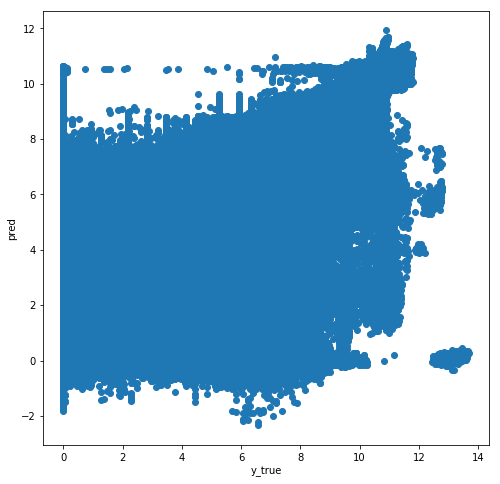

CPU times: user 4min 32s, sys: 784 ms, total: 4min 33s
Wall time: 4min 32s


In [21]:
%%time
plt.figure(figsize=(8,8))
plt.scatter(y_train, pred)
plt.xlabel('y_true')
plt.ylabel('pred')
plt.show()

In [22]:
import matplotlib.pyplot as plt

def plot_feature_importance(model):
    importance_df = pd.DataFrame(model.feature_importance(),
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance')
    fig, ax = plt.subplots(figsize=(6, 6))
    importance_df.plot.barh(ax=ax)
    plt.show()

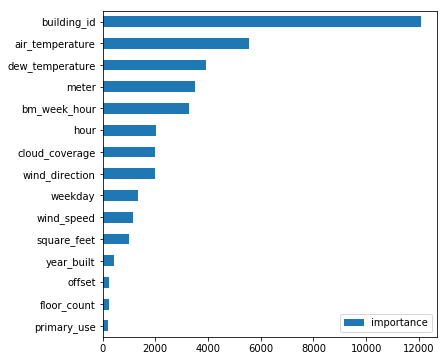

In [23]:
plot_feature_importance(model_half_1)

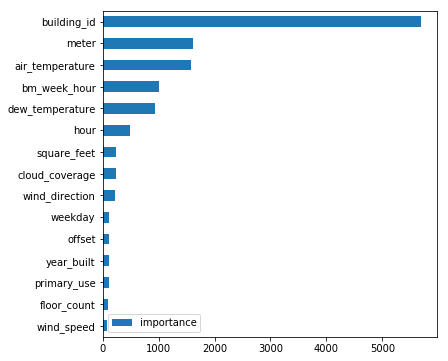

In [24]:
plot_feature_importance(model_half_2)

# Save Model

In [25]:
# save model to file
pickle.dump(model_half_1, open("model_half_1.pkl", "wb"))
pickle.dump(model_half_2, open("model_half_2.pkl", "wb"))
pickle.dump(pred, open("pred_L1.pkl", "wb"))

In [26]:
del X_train, X_half_1, X_half_2, y_half_1, y_half_2, d_half_1, d_half_2, 
del watchlist_1, watchlist_2, pred, pred1, pred2
gc.collect()

9284

# Preparing test data

In [27]:
weather_test = weather_df = pd.read_csv(DATA_PATH + 'weather_test.csv')

In [28]:
weather_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int64
timestamp             277243 non-null object
air_temperature       277139 non-null float64
cloud_coverage        136795 non-null float64
dew_temperature       276916 non-null float64
precip_depth_1_hr     181655 non-null float64
sea_level_pressure    255978 non-null float64
wind_direction        264873 non-null float64
wind_speed            276783 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB


In [29]:
%%time
# weather_test = pd.read_feather('../input/ashrae-feather/weather_test.ft')
df_test = pd.read_feather('../input/ashrae-feather/test.ft')
weather_test = fill_weather_dataset(weather_test)

df_test['hour'] = df_test['timestamp'].dt.hour
df_test['weekday'] = df_test['timestamp'].dt.weekday
df_test['bm'] = df_test['building_id'].apply(lambda x: str(x)) + '_' + df_test['meter'].apply(lambda x: str(x))
df_test = df_test.merge(bm, right_index=True, left_on=bm_cols, how='left')
df_test.drop('bm', axis=1, inplace=True)

df_test = reduce_mem_usage(df_test, use_float16=True)
weather_test = reduce_mem_usage(weather_test, use_float16=True)

X_test, row_ids = prepare_data(df_test, building, weather_test, test=True)

Memory usage of dataframe is 1391.81 MB
Memory usage after optimization is: 835.08 MB
Decreased by 40.0%
Memory usage of dataframe is 19.25 MB
Memory usage after optimization is: 6.15 MB
Decreased by 68.1%
Memory usage of dataframe is 2067.83 MB
Memory usage after optimization is: 1590.64 MB
Decreased by 23.1%
CPU times: user 3min 9s, sys: 49.1 s, total: 3min 58s
Wall time: 3min 42s


In [30]:
X_test.head()

,building_id,meter,hour,weekday,bm_week_hour,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,wind_direction,wind_speed,offset
0,0,0,0,6,235.035355,0,8.914062,2008.0,NaN,15.601562,2.0,12.796875,130.0,2.099609,5.0
1,1,0,0,6,120.079323,0,7.910156,2004.0,NaN,15.601562,2.0,12.796875,130.0,2.099609,5.0
2,2,0,0,6,11.518209,0,8.593750,1991.0,NaN,15.601562,2.0,12.796875,130.0,2.099609,5.0
3,3,0,0,6,363.260651,0,10.070312,2002.0,NaN,15.601562,2.0,12.796875,130.0,2.099609,5.0
4,4,0,0,6,1528.018066,0,11.664062,1975.0,NaN,15.601562,2.0,12.796875,130.0,2.099609,5.0


In [31]:
del df_test, building, weather_test
gc.collect()

22

# Scoring test data

In [32]:
%%time
pred = np.expm1(model_half_1.predict(X_test, num_iteration=model_half_1.best_iteration)) / 2

del model_half_1
gc.collect()

pred += np.expm1(model_half_2.predict(X_test, num_iteration=model_half_2.best_iteration)) / 2
    
del model_half_2
gc.collect()

CPU times: user 1h 30min 9s, sys: 13 s, total: 1h 30min 22s
Wall time: 47min 7s


12

# Submission

In [33]:
submission = pd.DataFrame({"row_id": row_ids, "meter_reading": np.clip(pred, 0, a_max=None)})
submission['meter_reading'] = submission['meter_reading'].astype('float32')
submission['row_id'] = submission['row_id'].astype('int32')
submission.to_csv("submission.csv", index=False, chunksize=25000)

In [34]:
submission.head()

,row_id,meter_reading
0,0,176.862976
1,1,90.677902
2,2,10.048888
3,3,297.768524
4,4,1161.955933


In [35]:
print(f"submission mean: {submission['meter_reading'].mean():.4f}")
print(f"submission std: {submission['meter_reading'].std():.4f}")
print(f"submission min: {submission['meter_reading'].min():.4f}")
print(f"submission max: {submission['meter_reading'].max():.4f}")

submission mean: 362.5631
submission std: 1738.4730
submission min: 0.0000
submission max: 93598.0859


In [36]:
submission[X_test['building_id'] > 105]

,row_id,meter_reading
2260081,2260081,2.700923
2260082,2260082,1.777285
2260083,2260083,61.097794
2260084,2260084,202.695984
2260085,2260085,204.148010
...,...,...
41697595,41697595,6.772488
41697596,41697596,4.644111
41697597,41697597,5.200692
41697598,41697598,165.697372


5

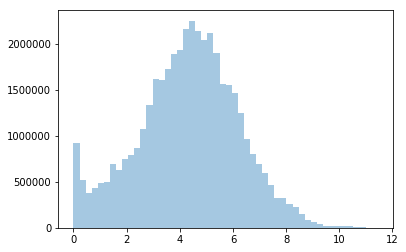

In [37]:
sns.distplot(np.log1p(submission['meter_reading'].values), kde=False);
gc.collect()

# Submission Validation (bld 0-104)

In [38]:
site0 = pd.read_feather('../input/ucf-building-meter-reading/site0.ft')
df_test = pd.read_feather('../input/ashrae-feather/test.ft')

In [39]:
merged = df_test.merge(site0, left_on=['building_id', 'meter', 'timestamp'], 
              right_on=['building_id', 'meter', 'timestamp'], how='left')

In [40]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [41]:
print(f'RMSLE of buildings 0-104: {rmsle(ytrue, pred):.4f}')

RMSLE of buildings 0-104: 1.1122


# Submission Validation ASU Site1 (bld 105-155)

In [42]:
site1 = pd.read_feather('../input/ucl-data-leakage-episode-2/site1.ft')
site1 = site1.query('timestamp >= 2017')

In [43]:
merged = df_test.merge(site1, left_on=['building_id', 'meter', 'timestamp'], 
              right_on=['building_id', 'meter', 'timestamp'], how='left')

In [44]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [45]:
del merged, site1
print(f'RMSLE of buildings 105-155: {rmsle(ytrue, pred):.4f}')

RMSLE of buildings 105-155: 0.7892


# Submission Validation ASU Site2 (bld 156-290)

In [46]:
site2 = pd.read_feather('../input/asu-feather/site2.ft')
site2 = site2.query('timestamp >= 2017')

In [47]:
merged = df_test.merge(site2, left_on=['building_id', 'meter', 'timestamp'], 
              right_on=['building_id', 'meter', 'timestamp'], how='left')

In [48]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [49]:
del site2, merged
print(f'RMSLE of buildings 156-290: {rmsle(ytrue, pred):.4f}')

RMSLE of buildings 156-290: 0.9804


# Submission Validation UCB Site4 (74 blds)

In [50]:
site4 = pd.read_feather('../input/ucb-feather/site4.ft')
site4 = site4.query('timestamp >= 2017')

In [51]:
merged = df_test.merge(site4, left_on=['building_id', 'timestamp'], 
              right_on=['building_id', 'timestamp'], how='left')

In [52]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [53]:
del site4, merged
print(f'RMSLE of 74/91 buildings : {rmsle(ytrue, pred):.4f}')

RMSLE of 74/91 buildings : 0.4036


# Submission Validation Cornell Site15 (bld 1325-1448)

In [54]:
site15 = pd.read_feather('../input/cornell-feather/site15.ft')
site15 = site15.query('timestamp >= 2017')
site15 = site15.drop_duplicates()

In [55]:
merged = df_test.merge(site15, left_on=['building_id', 'meter', 'timestamp'], 
              right_on=['building_id', 'meter', 'timestamp'], how='left')

In [56]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [57]:
del site15, merged
print(f'RMSLE of buildings 1325-1448: {rmsle(ytrue, pred):.4f}')

RMSLE of buildings 1325-1448: 0.6349


# Submission Validation Site0-2 (bld 0-290)

In [58]:
site012 = pd.read_feather('../input/comb-leaked-dataset/site012.ft')
site012 = site012.query('timestamp >= 2017')

In [59]:
merged = df_test.merge(site012, left_on=['building_id', 'meter', 'timestamp'], 
              right_on=['building_id', 'meter', 'timestamp'], how='left')

In [60]:
ytrue = merged[~merged['meter_reading'].isna()]['meter_reading']
pred = submission[~merged['meter_reading'].isna()]['meter_reading']

In [61]:
del site012, merged
print(f'RMSLE of buildings 0-290: {rmsle(ytrue, pred):.4f}')

RMSLE of buildings 0-290: 0.9942
